In [5]:
access_token = 'vk1.a.agZUVkmsVvrIPBlS3vbWe4FE0-aQzZP27OV6HA2UenNqr316lIBwCF45CjjJ4plKc84zHCrlSwytlflP0zWfEJ-pu-utCs9RY1p8unD1BcfIeVkdLT6zRmc43-EIOjTvhfwKR7YL2Wqss4blZZFLRzB75QaQDbqmXCVsH_ZNAtZ-AXlZM37hJRQPZLZ1xLXsKMlafXy7ynUcW2XZ0T3YGQ'

In [2]:
pip install vk

Note: you may need to restart the kernel to use updated packages.


In [6]:
import vk, vk_api

In [8]:
vk_session = vk_api.VkApi(token = access_token)
vk = vk_session.get_api()

In [9]:
users = vk.users.get(user_id = 38268130, fields='id,about,bdate,city,country,followers_count')

In [10]:
users

[{'id': 38268130,
  'bdate': '14.4',
  'city': {'id': 1, 'title': 'Москва'},
  'country': {'id': 1, 'title': 'Россия'},
  'followers_count': 2679,
  'first_name': 'Мария',
  'last_name': 'Горденко',
  'can_access_closed': True,
  'is_closed': False}]

## Часть 2

In [11]:
import requests
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

In [12]:
def get_friends(token, user_id, with_name = False):
    fields = 'first_name, last_name' if with_name else ''
    url = 'https://api.vk.com/method/friends.get?' + \
                        'access_token={}&user_id={}&fields={}&v=5.81'.format(token,user_id, fields)
    response = requests.get(url).json()
    if response.get('error'):
        print(response.get('error'))
        return []
    return response.get('response').get('items')

In [13]:
CENTRAL_USER_ID = 249618246

In [14]:
central_users = get_friends(access_token, CENTRAL_USER_ID)

In [15]:
CENTRAL_USER_ID = 249618246
central_users = get_friends(access_token, CENTRAL_USER_ID, with_name=True)
central_users = {user_dict['id']: user_dict.get('first_name') + \
                ' ' + user_dict.get('last_name') for user_dict in central_users}

central_users[CENTRAL_USER_ID] = 'Я'

In [16]:
central_users

{253123: 'Денис Ефремов',
 4587035: 'Игорь Дубинников',
 12819398: 'Александр Гусев',
 15795549: 'Владимир Сидякин',
 16908603: 'Иван Глазков',
 18097062: 'Vovka Vaskin',
 25039024: 'Alina Gofman',
 33240854: 'Дмитрий Сыч',
 34114816: 'Сергей Орещук',
 48566585: 'Кристина Корнаухова',
 50256937: 'Кристина Гуляева',
 52615927: 'Кирилл Трусов',
 53093481: 'Лёнька Бусов',
 57575705: 'Соня Перевощикова',
 63427416: 'Даниил Потапов',
 73758913: 'Филипп Арифулов',
 85713141: 'Влад Аврелькин',
 89046653: 'Дмитрий Костров',
 99213949: 'Артём Бурдаков',
 101180492: 'Александр Борискин',
 101894477: 'Алексей Филёв',
 109834149: 'Зула Евгеев',
 114142954: 'Юлия Кошелева',
 132374238: 'Вова Волков',
 150574398: 'Милена Ишкуватова',
 151249654: 'Софья Евстафьева',
 152960098: 'Никита Виноградов',
 154823651: 'Anna Maksimova',
 154952907: 'Антон Максимов',
 158041260: 'Никита Товарнов',
 158551148: 'Дарья Фадеева',
 160913906: 'Павел Киричек',
 163457707: 'Диана Блунт',
 166681264: 'Данил Голубев',


In [17]:
graph = {}

for user_id in central_users.keys():
    graph[user_id] = get_friends(access_token, user_id)
    time.sleep(random.randint(1, 10) / 100)

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '48566585'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '50256937'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '52615927'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '53093481'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': '

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '48042116'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '48826865'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '49312418'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '49545060'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': '

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '86018622'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '86251097'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '87233800'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '87546872'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': '

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '134177984'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '134275953'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '134936805'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '135317454'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '171600556'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '171887334'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '171936271'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '172467877'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '216550275'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '216663433'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '216980769'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '217251285'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '273632347'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '276069676'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '279652240'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '280161521'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '373097989'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '375148711'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '375642450'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '379858572'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value

{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '585606338'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '587134787'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '587362741'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 6, 'error_msg': 'Too many requests per second', 'request_params': [{'key': 'user_id', 'value': '589324221'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value

In [18]:
uniqie_users = set(graph.keys())

In [19]:
for users_friends in graph.values():
    uniqie_users.update(users_friends)
print(len(users_friends))

143


In [20]:
g = nx.Graph()
for user_id, user_friends in graph.items():
    g.add_node(central_users[user_id])
    for friends_id in user_friends:
        if friends_id in central_users:
            g.add_edge(central_users[user_id], central_users[friends_id])

In [21]:
def graph_plot():
    plt.figure(figsize=(12, 9))
    nx.draw_kamada_kawai(g, with_labels=False, node_size=50, width=0.5)
    plt.show()

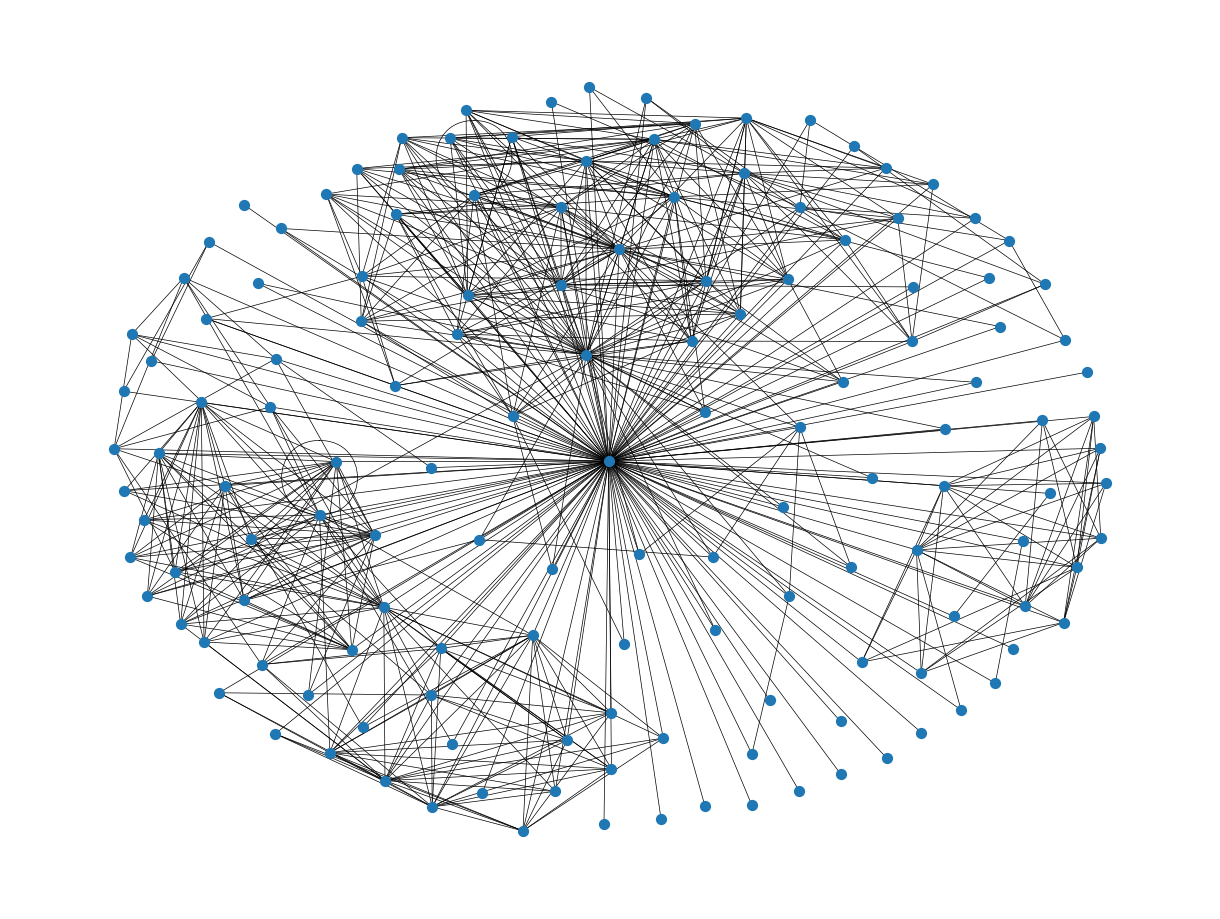

In [22]:
graph_plot()

In [23]:
g.remove_node(central_users[CENTRAL_USER_ID])

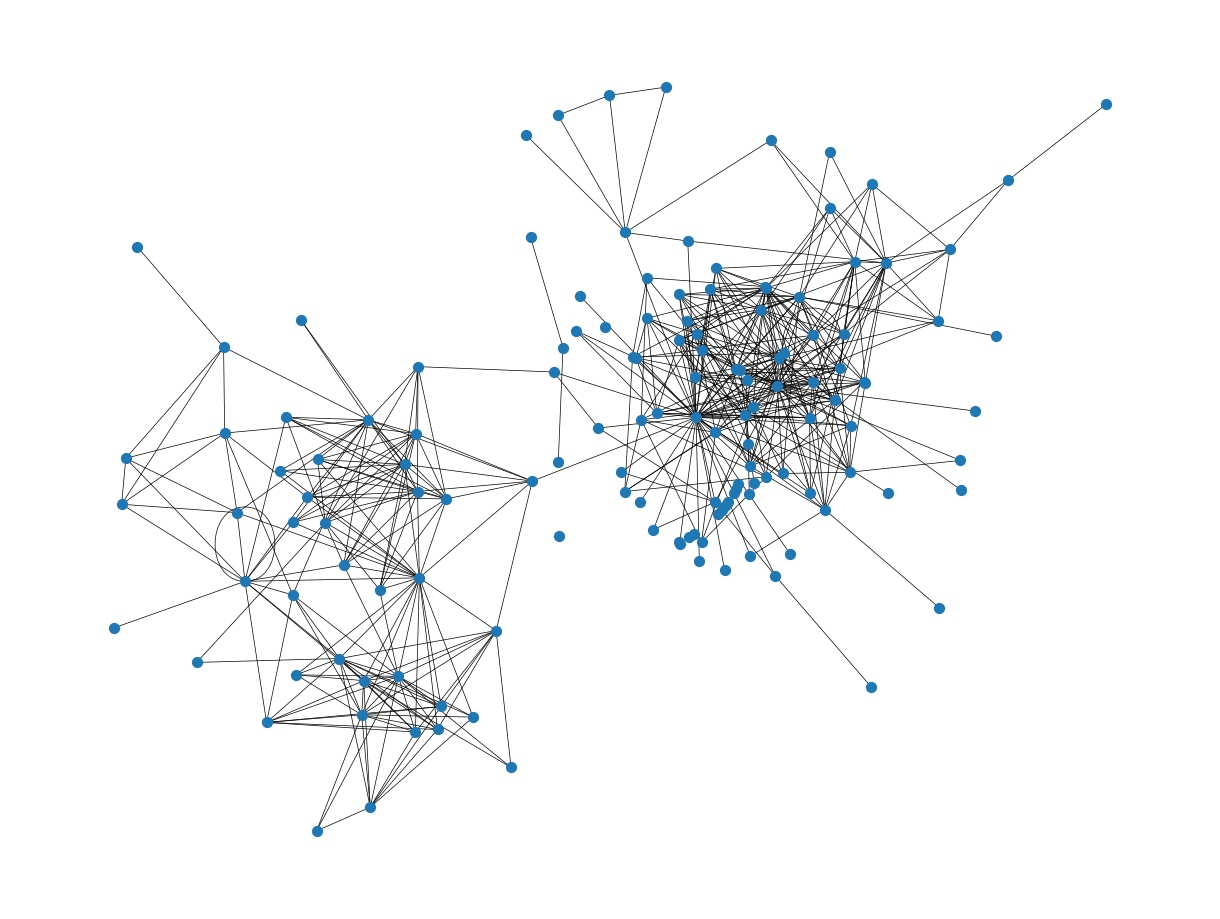

In [24]:
graph_plot()

In [25]:
def graph_plot2():
    plt.figure(figsize=(12, 9))
    nx.draw_kamada_kawai(g, with_labels=True, node_size=50, width=0.5)
    plt.show()

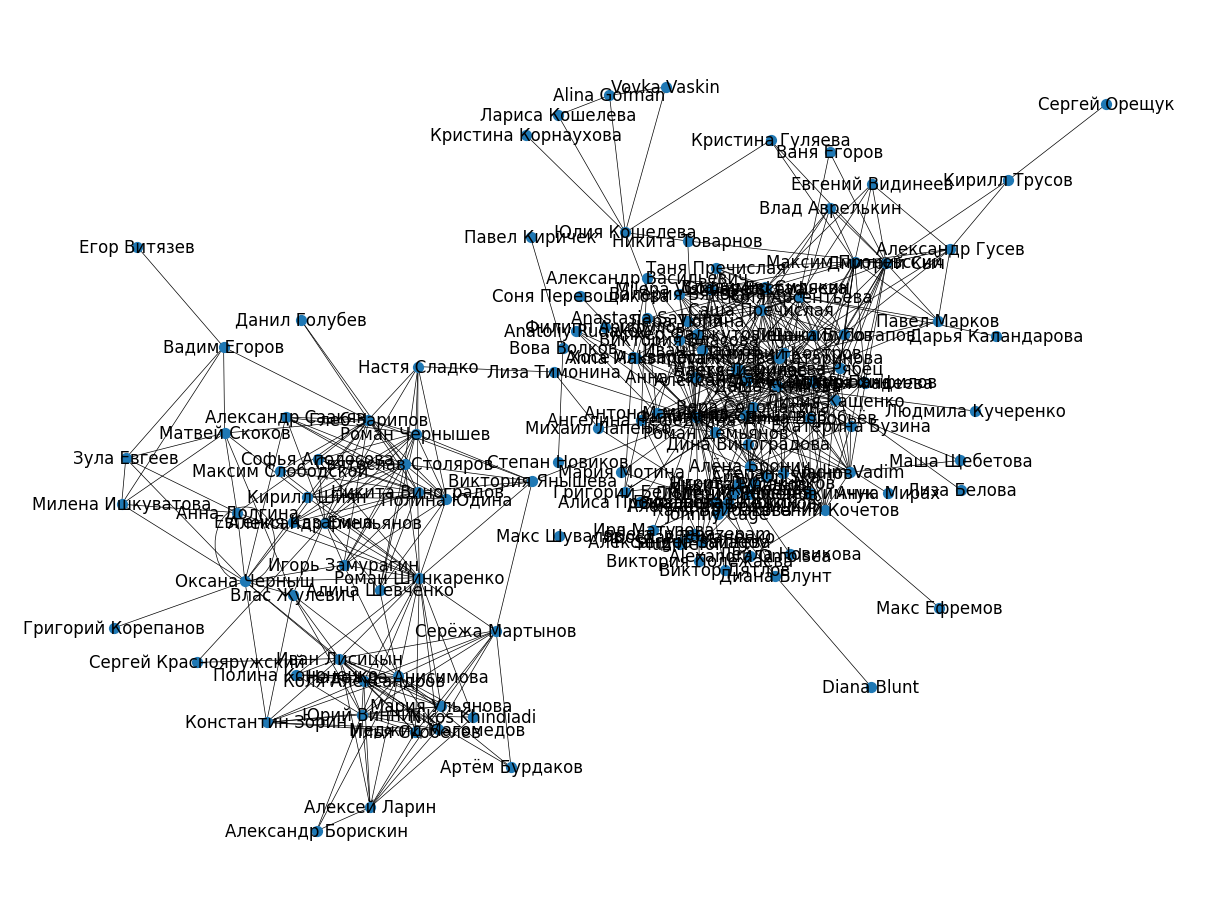

In [26]:
graph_plot2()

## 2 task

In [27]:
friends_id = list(central_users.keys())

In [28]:
users = vk.users.get(user_id =friends_id, fields='id,about,bdate,city,country,followers_count')

In [29]:
friends_df = pd.DataFrame.from_dict(users)

In [30]:
def extract_city(text):
    if pd.isna(text):
        return text
    text_dict = dict(text)
    if not pd.isna(text_dict['title']):
        return text_dict['title']
    else:
        return text_dict['title']

In [31]:
friends_df['city'] = friends_df['city'].apply(extract_city) 

In [32]:
friends_df.dropna(subset=['city'], inplace=True)

In [33]:
friends_df.to_csv('friends.csv', index=False, encoding='utf-8-sig')

In [37]:
city_friends = friends_df['city']
city_friends = city_friends.value_counts().to_dict()
city_friends

{'Москва': 59,
 'Пушкино': 8,
 'Санкт-Петербург': 6,
 'Лесной': 2,
 'Ульяновск': 1,
 'Düsseldorf': 1,
 'Екатеринбург': 1,
 'Таганрог': 1,
 'Щелково': 1,
 'Реутов': 1,
 'Beacon Hills': 1,
 'Чебоксары': 1,
 'Воркута': 1,
 'Набережные Челны': 1,
 'Пермь': 1,
 'Miami Gardens': 1,
 'Курск': 1,
 'Praha': 1,
 'Tokyo': 1,
 'Gayville': 1,
 'Нижний Новгород': 1,
 'Zürich': 1,
 'Уфа': 1}

In [43]:
API_KEY = 'a32d9fe1-e8a4-415c-86a7-1fa32378d8a7'
geocoder = YandexGeocoder(api_key=API_KEY)

In [44]:
import requests
from dataclasses import dataclass

@dataclass
class YandexGeocoder:
    api_key: str
    geocoder_url: str = 'https://geocode-maps.yandex.ru/1.x'

    def adress_to_geopoint(self, address: str) -> str:
        """
        Преобразование адреса в геокоординаты в формате Datalens
        """
        response = requests.get(self.geocoder_url, params={
            'apikey': self.api_key,
            'geocode': address,
            'format': 'json',
        })
        response.raise_for_status()

        result = response.json()['response']['GeoObjectCollection']['featureMember']
        if not result:
            return None

        lat, lon = result[0]['GeoObject']['Point']['pos'].split(' ')
        return self._to_datalens_format(lon, lat)
    
    def _to_datalens_format(self, lon, lat):
        return f'[{lon},{lat}]'

In [46]:
df_city_friends = pd.DataFrame(columns=['city', 'count', 'coord'])
df_city_friends['city'] = city_friends.keys()
df_city_friends['count'] = df_city_friends['city'].apply(lambda x: city_friends[x]) 
df_city_friends['coord'] = df_city_friends['city'].apply(lambda x: geocoder.adress_to_geopoint(x))
df_city_friends

,city,count,coord
0,Москва,59,"[55.755864,37.617698]"
1,Пушкино,8,"[56.011318,37.847164]"
2,Санкт-Петербург,6,"[59.938784,30.314997]"
3,Лесной,2,"[58.635513,59.79863]"
4,Ульяновск,1,"[54.314192,48.403132]"
5,Düsseldorf,1,"[51.230569,6.787428]"
6,Екатеринбург,1,"[56.838011,60.597474]"
7,Таганрог,1,"[47.208735,38.936694]"
8,Щелково,1,"[55.92022,37.991532]"
9,Реутов,1,"[55.760515,37.85515]"


In [47]:
df_city_friends.to_csv('city_friends.csv', index=False, encoding='utf-8-sig')

## [Ссылка на dashboard](https://datalens.yandex.ru/wizard/4abcgk9n9wlet-friends-dataset-city-karta)

## Часть 3

In [56]:
len(test['items'])

500

In [77]:
cities = vk.database.getCities(q='Якутск')

In [78]:
cities

{'count': 3,
 'items': [{'id': 168,
   'title': 'Якутск',
   'country': 'Республика Саха (Якутия)'},
  {'id': 5483207,
   'title': 'Городской округ Город Якутск',
   'country': 'Республика Саха (Якутия)'},
  {'id': 1127882,
   'title': '9 км Якутского тракта',
   'area': 'Иркутский район',
   'region': 'Иркутская область'}]}

In [80]:
id_ikutsk = cities['items'][0]['id']
id_ikutsk

168

## Парсинг 10к людей
Подход будет заключаться в том, что мы сделаем множество запросов по разным дням и месяцев рождения, сначала запросы будут к одному полу, потом к другому)

In [158]:
days = random.sample(range(1, 29), 10)
months = random.sample(range(1, 13), 5)
days, months

([13, 18, 8, 28, 22, 12, 25, 14, 17, 5], [2, 3, 6, 8, 5])

In [161]:
people = pd.DataFrame()

## Собираем мужчин
for i in range(len(days)):
    for j in range(len(months)):
        day = days[i]
        month = months[j]
        parsed_users = vk.users.search(count=1000, fields=['bdate', 'city', 'sex'], city=id_ikutsk, sex=2, birth_day=day, birth_month=month)
        temp_df = pd.DataFrame(parsed_users['items'])
        people = pd.concat([people, temp_df])

In [162]:
## Собираем женщин
for i in range(len(days)):
    for j in range(len(months)):
        day = days[i]
        month = months[j]
        parsed_users = vk.users.search(count=1000, fields=['bdate', 'city', 'sex'], city=id_ikutsk, sex=1, birth_day=day, birth_month=month)
        temp_df = pd.DataFrame(parsed_users['items'])
        people = pd.concat([people, temp_df])

In [163]:
people.head(3)

,id,bdate,city,track_code,sex,first_name,last_name,can_access_closed,is_closed
0,283219960,13.2,"{'id': 4189870, 'title': 'Alcoy - Alcoi'}",257b24bdQfUPsE5nK6p5qnbdV_KiYkoNGMC_Hq3g4wpdXa...,2,Егор,Максимов,True,False
1,464159207,13.2.1999,NaN,ae7c2dc4y0ss5upuZSGuD4Y_Y7L83ADb2WvurAeIHX5sE4...,2,Кеша,Тейрин,False,True
2,572910223,13.2.2003,NaN,04394e5b1ttgwjtVbMTsgJo5g9hRbHpAmQlXxJyG-Mi4P_...,2,Андрей,Жирков,False,True


In [164]:
people.shape

(51322, 9)

### Возьмем людей только с полной датой рождения

In [165]:
people.dropna(subset=['bdate'], inplace=True)

In [166]:
people_full_bdate = people.loc[people['bdate'].str.split('.').apply(len) == 3]

In [170]:
men = people_full_bdate.loc[people_full_bdate['sex'] == 2].sample(n=5000)
girls = people_full_bdate.loc[people_full_bdate['sex'] == 1].sample(n=5000)

In [171]:
result_random_users = pd.concat([men, girls])

In [172]:
result_random_users.shape, result_random_users['sex'].value_counts()

((10000, 9),
 sex
 2    5000
 1    5000
 Name: count, dtype: int64)

In [173]:
result_random_users.to_csv('10k_users.csv', index=False, encoding='utf-8-sig')